# Identify proteins that have been targeted by ChEMBL, DrugBank and FDA

In [1]:
# Author: Lisa Boatner
# Date Created: 221128
# Date Modified: 221206
# Updates: 

# Import Modules 

In [2]:
import os, sys
import pandas as pd
import numpy as np
from venn import venn
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [3]:
# assuming current directory is main folder
os.chdir('data')
cd = os.getcwd()
cd

'C:\\Users\\Onee-sama\\Documents\\GitHub\\protein_function_annotations\\protein_druggability_annotations\\data'

In [4]:
# set the date for naming files
date = '2401'

# 

# UniProtKB

## Download UniProt File with columns: Entry, Entry Name, Protein Names, Gene Names, Description, ChEMBL, DrugBank
## https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength%2Cgene_primary%2Cgene_synonym%2Ckeyword&format=xlsx&query=%28Human%29+AND+%28model_organism%3A9606%29+AND+%28reviewed%3Atrue%29&size=500

In [5]:
u_df = pd.read_excel('uniprotkb_Human_AND_model_organism_9606_2024_06_25.xlsx')

C:\ProgramData\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
u_df.shape

(20435, 9)

In [7]:
u_df.head()

,Entry,Entry Name,Gene Names,Gene Names (primary),Gene Names (synonym),Protein names,HPA,ChEMBL,DrugBank
0,A0A087X1C5,CP2D7_HUMAN,CYP2D7,CYP2D7,NaN,Putative cytochrome P450 2D7 (EC 1.14.14.1),NaN,CHEMBL3542437;,NaN
1,A0A0B4J2F0,PIOS1_HUMAN,PIGBOS1,PIGBOS1,NaN,Protein PIGBOS1 (PIGB opposite strand protein 1),ENSG00000225973;,NaN,NaN
2,A0A0B4J2F2,SIK1B_HUMAN,SIK1B,SIK1B,NaN,Putative serine/threonine-protein kinase SIK1B...,NaN,NaN,NaN
3,A0A0C5B5G6,MOTSC_HUMAN,MT-RNR1,MT-RNR1,NaN,Mitochondrial-derived peptide MOTS-c (Mitochon...,NaN,NaN,NaN
4,A0A0K2S4Q6,CD3CH_HUMAN,CD300H,CD300H,NaN,Protein CD300H (CD300 antigen-like family memb...,ENSG00000284690;,NaN,NaN


In [8]:
u_df.columns.to_list()

['Entry',
 'Entry Name',
 'Gene Names',
 'Gene Names (primary)',
 'Gene Names (synonym)',
 'Protein names',
 'HPA',
 'ChEMBL',
 'DrugBank']

In [9]:
chembl_df = u_df[u_df['ChEMBL'].isna() == False]
chembl_ids = list(chembl_df['Entry'].unique())
len(chembl_ids)

4605

In [10]:
drugbank_df = u_df[u_df['DrugBank'].isna() == False]
drugbank_ids = list(drugbank_df['Entry'].unique())
len(drugbank_ids)

3202

# 

# Human Protein Atlas FDA 

## Download Human Protein Atlas version 22.0
## https://www.proteinatlas.org/about/download¶

In [11]:
h_df = pd.read_table('proteinatlas.tsv')

In [12]:
h_df.shape

(20162, 89)

In [13]:
h_df.head()

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Pathology prognostics - Lung cancer,Pathology prognostics - Melanoma,Pathology prognostics - Ovarian cancer,Pathology prognostics - Pancreatic cancer,Pathology prognostics - Prostate cancer,Pathology prognostics - Renal cancer,Pathology prognostics - Stomach cancer,Pathology prognostics - Testis cancer,Pathology prognostics - Thyroid cancer,Pathology prognostics - Urothelial cancer
0,TSPAN6,"T245, TM4SF6, TSPAN-6",ENSG00000000003,Tetraspanin 6,O43657,X,100627108-100639991,"Predicted intracellular proteins, Predicted me...",NaN,NaN,...,unprognostic (1.09e-2),unprognostic (1.19e-2),unprognostic (1.80e-3),unprognostic (2.04e-3),unprognostic (8.76e-2),unprognostic (3.83e-3),unprognostic (4.28e-2),unprognostic (1.14e-1),unprognostic (2.24e-1),unprognostic (9.54e-3)
1,TNMD,"BRICD4, ChM1L, myodulin, TEM, tendin",ENSG00000000005,Tenomodulin,Q9H2S6,X,100584936-100599885,Predicted membrane proteins,NaN,NaN,...,NaN,NaN,unprognostic (2.15e-1),unprognostic (2.36e-2),unprognostic (1.37e-1),unprognostic (9.40e-2),unprognostic (9.60e-4),unprognostic (6.82e-2),unprognostic (5.67e-2),unprognostic (1.48e-1)
2,DPM1,"CDGIE, MPDS",ENSG00000000419,Dolichyl-phosphate mannosyltransferase subunit...,O60762,20,50934867-50959140,"Disease related genes, Enzymes, Human disease ...",NaN,"Glycosyltransferase, Transferase",...,unprognostic (1.10e-1),unprognostic (7.49e-2),unprognostic (2.53e-2),unprognostic (1.29e-2),unprognostic (3.61e-2),unprognostic (3.02e-3),unprognostic (4.98e-2),unprognostic (2.59e-1),unprognostic (3.58e-1),unprognostic (2.74e-1)
3,SCYL3,"PACE-1, PACE1",ENSG00000000457,SCY1 like pseudokinase 3,Q8IZE3,1,169849631-169894267,"Enzymes, Predicted intracellular proteins",NaN,NaN,...,unprognostic (2.12e-2),unprognostic (2.85e-2),unprognostic (7.17e-2),unprognostic (8.80e-2),unprognostic (9.88e-2),unprognostic (1.20e-3),unprognostic (3.54e-1),unprognostic (1.75e-1),unprognostic (4.60e-2),prognostic favorable (8.85e-4)
4,C1orf112,FLJ10706,ENSG00000000460,Chromosome 1 open reading frame 112,Q9NSG2,1,169662007-169854080,Predicted intracellular proteins,NaN,NaN,...,unprognostic (2.09e-1),unprognostic (9.11e-3),unprognostic (8.79e-2),unprognostic (3.47e-3),unprognostic (5.97e-2),unprognostic (1.65e-8),unprognostic (1.76e-1),unprognostic (2.81e-2),unprognostic (6.17e-2),unprognostic (2.63e-1)


In [14]:
# create FDA label
h_fda = h_df['Protein class'].str.contains('FDA approved drug targets')
h_df['HPA'] = True
h_df['FDA'] = h_fda

In [15]:
h_fda_df = h_df[h_df['FDA'] == True]
fda_ids = list(h_fda_df['Uniprot'].unique())
len(fda_ids)

851

# 

# Merge UniProtKB and FDA 

In [16]:
u_df['FDA'] = np.where(u_df['Entry'].isin(fda_ids), 'yes', None)
u_df['FDA'].value_counts()

yes    849
Name: FDA, dtype: int64

In [17]:
u_df.to_csv(date + '_uniprot_annotated_druggability.csv', index = False)

# 

# Read Experimental Results

In [18]:
# read csv file, specify enrichment at the protein level or cysteine level
# specify the name of the csv file you want to analyze
# ex. filename: 'compiled_proteins.csv'
df = pd.read_csv('compiled_proteins.csv')

In [19]:
df.shape

(1710, 32)

In [20]:
df.head()

,protein,description,gene,identifiers,peptides,peptide_count,spectral_count,modifications,modification_count,amino_acids,...,Experiment-1_avg_of_medians,Experiment-2_avg_of_medians,Experiment-1_stdev_of_medians,Experiment-2_stdev_of_medians,total_quant_list,Experiment-1_Exp1_Replicate-2_median,Experiment-1_Exp1_Replicate-1_median,Experiment-2_Exp2-Replicate-1_median,Experiment-2_Exp2-Replicate-2_median,Unnamed: 31
0,Q86X55,Histone-arginine methyltransferase CARM1,CARM1,Q86X55_C26,AAAAAAVGPGAGGAGSAVPGGAGPC*ATVSVFPGAR,1,3,25_C[527.3213];25_C[521.3074],2,C,...,1.291182,1.295200,NaN,NaN,1.2911815216979126;1.295200001608753,1.291182,NaN,1.295200,NaN,NaN
1,Q99615,DnaJ homolog subfamily C member 7,DNAJC7,Q99615_C7,AAAAEC*DVVMAATEPELLDDQEAKR,1,3,6_C[521.3074];6_C[527.3213],2,C,...,1.347838,4.039893,NaN,NaN,1.3478380214036192;4.039893401046718,1.347838,NaN,4.039893,NaN,NaN
2,Q5SRE5,Nucleoporin NUP188 homolog,NUP188,Q5SRE5_C9;Q5SRE5_C1270,AAAAGGPC*VR;HSLALGSATEDKDSMETDDC*SR,2,4,8_C[527.3213];8_C[521.3074];20_C[527.3213];20_...,4,C,...,1.020498,0.846141,NaN,NaN,1.0204981401893118;0.8102536010867071;0.882029...,1.020498,NaN,0.846141,NaN,NaN
3,Q8IYU8,Calcium uptake protein 2; mitochondrial,MICU2,Q8IYU8_C8,AAAAGSC*AR,1,2,7_C[527.3213];7_C[521.3074],2,C,...,1.050002,NaN,NaN,NaN,1.0500022223666556,1.050002,NaN,NaN,NaN,NaN
4,Q9NRL3,Striatin-4,STRN4,Q9NRL3_C17,AAAAVAAAASSC*RPLGSGAGPGPTGAAPVSAPAPGPGPAGK,1,2,12_C[527.3213];12_C[521.3074],2,C,...,1.432112,NaN,NaN,NaN,1.432112392544983,1.432112,NaN,NaN,NaN,NaN


In [21]:
df.columns.to_list()

['protein',
 'description',
 'gene',
 'identifiers',
 'peptides',
 'peptide_count',
 'spectral_count',
 'modifications',
 'modification_count',
 'amino_acids',
 'amino_acid_count',
 'modification_masses',
 'no_of_experiments_count',
 'no_of_replicates_count',
 'Experiment-1_experiment_count',
 'Experiment-2_experiment_count',
 'Experiment-1_Exp1_Replicate-2_replicate_count',
 'Experiment-1_Exp1_Replicate-1_replicate_count',
 'Experiment-2_Exp2-Replicate-1_replicate_count',
 'Experiment-2_Exp2-Replicate-2_replicate_count',
 'aggregate_avg_of_avg_of_medians',
 'aggregate_stdev_of_avg_of_medians',
 'Experiment-1_avg_of_medians',
 'Experiment-2_avg_of_medians',
 'Experiment-1_stdev_of_medians',
 'Experiment-2_stdev_of_medians',
 'total_quant_list',
 'Experiment-1_Exp1_Replicate-2_median',
 'Experiment-1_Exp1_Replicate-1_median',
 'Experiment-2_Exp2-Replicate-1_median',
 'Experiment-2_Exp2-Replicate-2_median',
 'Unnamed: 31']

In [23]:
# # subset dataset based on criteria
# df = df[df[['your_column_name'] == 'specific_value']]
# specify experimental group as all genes with 
# log2ratio >= X or log2ratio <= X
# ex. column name for selecting cutoff: 'aggregate_avg_of_avg_of_medians'
# ex. log2ratio cuttoff: 2
cutoff = 2
lig_df = df[df['aggregate_avg_of_avg_of_medians'] >= cutoff]
lig_ids = list(lig_df['protein'].unique())

# 

# Compare the number of ligandable proteins to those that have been targeted by ChEMBL, DrugBank and FDA 

In [54]:
def get_drug_venn(df, name, colors):

    cmp = ListedColormap(colors)

    v = venn(df,
            fontsize=15, 
            cmap = cmp,
            legend_loc="upper center",
            figsize =(10, 8),
            alpha = 0.5)
    
    plt.savefig(date + '_' + name + '_venn.png', dpi = 300, bbox_inches = 'tight')
    plt.show()

In [58]:
# create sets of protein ids for each group
drug_comparison = {
    'Ligandable': set(lig_ids),
    'ChEMBL': set(chembl_ids),
    'DrugBank': set(drugbank_ids),
    'FDA': set(fda_ids)
}

In [59]:
# print raw number of unique proteins in each group
len(lig_ids), len(chembl_ids), len(drugbank_ids), len(fda_ids)

(186, 4605, 3202, 851)

In [60]:
# set name of output file, list of 4 colors for each group
output_filename = 'drug_comparison'
venn_colors = ["#43cd80", "deeppink", "firebrick", "darkmagenta"]

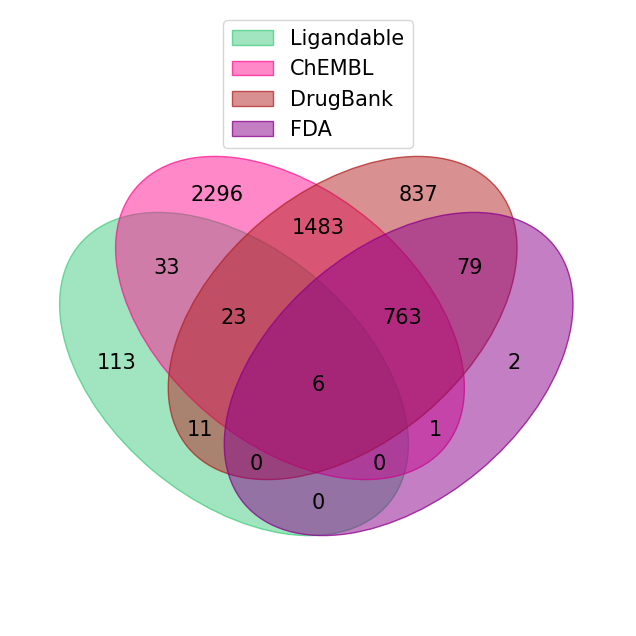

In [61]:
# create 4-way venn for common protein ids across the 4 groups
# options: drug_comparison dictionary, name of output file, list of 4 colors for each group
get_drug_venn(drug_comparison, 
              output_filename, 
              venn_colors)